# Zaključivanje o modelu
Nakon testiranja pretpostavki o regresionom modelu (L.I.N.E. pretpostavke) želimo da tumačimo rezultate; ispitujemo kvalitet i pouzdanost modela.
Tako ćemo u nastavku:
- ispitati linearnost model preko [t-testa](##testiranje-linearnosti-pomocu-t-testa).
- naći raspon mogućih vrednosti za parametre modela (nagib i odsečak) koristeći [interval poverenja](##interval-poverenja).
- naći raspon mogućih vrednosti za $Y$ koristeći [interval predikcije](##interval-predikcije).

Učitavamo neophodne pakete i skup podataka:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

matplotlib.rcParams['figure.figsize'] = (8, 4)
sb.set(font_scale=1.)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/housing.csv', sep=',')
df.head()

,price,lotsize(m^2),bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,74700,658.4799,3,1,1,1,1,1,0,0,2,1
1,85000,652.4388,3,1,1,1,0,1,0,1,2,1
2,68500,650.5800,3,1,2,1,0,1,0,0,0,0
3,82900,650.5800,3,1,1,1,0,1,0,0,2,1
4,86000,641.2860,3,2,1,1,1,1,0,0,0,1


Kao i do sad, pravimo model linearne regresije koji predviđa cenu kuće $Y$ na osnovu površine placa $X$.

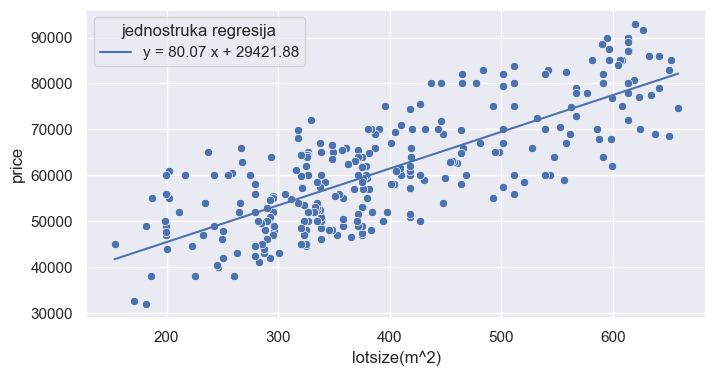

In [3]:
x = df['lotsize(m^2)'].values.reshape(-1,1)
y = df['price']

# izračunaj nagib i presek za liniju koja se najbolja uklapa (best fit)
model = LinearRegression().fit(x, y)
# prediktuj y za svako x
y_pred = model.predict(x)

intercept = model.intercept_.item()
slope = model.coef_.item()

# plotuj podatke i liniju koja se najbolje uklapa (best fit)
sb.scatterplot(data=df, x='lotsize(m^2)', y='price');
plt.plot(x, y_pred, 'b', label=f'y = {slope:.2f} x + {intercept:.2f}')
plt.legend(title='jednostruka regresija')
plt.show()

Isti ovaj model pravimo koriste'i `statsmodels` paket umesto `scikit-learn` paketa. Prednost je što regresioni model iz `statsmodels` paketa nudi dodatne statističke vrednosti i testove koji će nam trebati u nastavku.

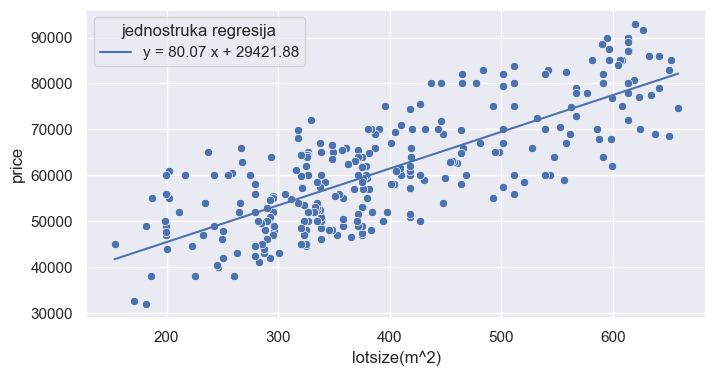

In [4]:
# isti kod, ali koristeci statsmodels umesto scikit-learn
x = df['lotsize(m^2)']
y = df['price']

x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const).fit()
y_pred = model.predict(x_with_const)

intercept, slope = model.params

# plotuj podatke i liniju koja se nabolje uklapa (best fit)
sb.scatterplot(data=df, x='lotsize(m^2)', y='price')
plt.plot(x, y_pred, 'b', label=f'y = {slope:.2f} x + {intercept:.2f}')
plt.legend(title='jednostruka regresija')
plt.show()


## Testiranje linearnosti pomoću t-testa
Linearnost - pretpostavka važi kada je odnos između $X$ i $Y$ linearan ✅. 
Ovu pretpostavku smo do sad testirali vizualno preko grafika.
Drugi nacin da testiramo je koristeći statističke testove, konkretno **t-test** (slično kao što smo na prethodnim vežbama testirali ostale L.I.N.E. pretpostavke putem statističkih testova).

T-test testira da li postoji linearan odnos između $X$ i $Y$.
Hipoteza kaže (test pretpostavlja) da: **ne postoji** linearna veza između $X$ i $Y$ tj. $a=0$ u $y = ax + b$.

Ovu hipotezu testiramo koristeći **T-vrednost** iz t-distribucije:

- Ako T-vrednost nije česta (T-vrednost je daleko od 0), onda odbacujemo hipotezu i zaključujemo da odnos između $X$ i $Y$ **jeste** linearan ✅.
- Ako T-vrednost jeste česta (T-vrednost je oko 0), onda ne možemo da odbacimo hipotezu. *Napomena: ako je T-vrednost česta, to ne znači da je veza nelinearna; ne znamo da li veza linearna ili nelinearna.*

Primer T-vrednosti i t-distribucije:

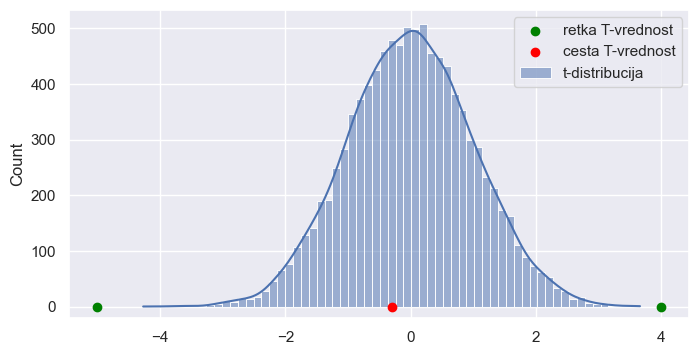

In [5]:
def plot_t_dist():
    '''Sample values from t-distribution and plot histogram for simple linear regression.'''
    np.random.seed(42)
    degrees_of_freedom = len(y) - 2 # jer imamo 2 parametra, a i b
    data = np.random.standard_t(degrees_of_freedom, size=10000)
    sb.histplot(data, kde=True, label='t-distribucija');

# plotuj t-distribuciju
plot_t_dist()

# primeri T-vrednosti
plt.scatter([4, -5], [0, 0], label='retka T-vrednost', c='green')
plt.scatter(-0.3, 0, label=f'cesta T-vrednost', c='red')
plt.ylim(-20)
plt.legend()
plt.show()

Zanima nas konkretna T-vrednost za naš regresioni model. T-vrednost ne računamo ručno već koristimo `statsmodels` koji automatski računa T-vrednost.
Crtamo t-distribuciju i konkretnu T-vrednost za površinu placa (dobijamo iz `statsmodels` paketa).
Gledamo grafik koliko je česta konkretna T-vrednost za površinu placa.

*Alternativno, T-vrednost možemo da pročitamo i pozivom `summary()` metode nad modelom (obelezeno sa `t`).*

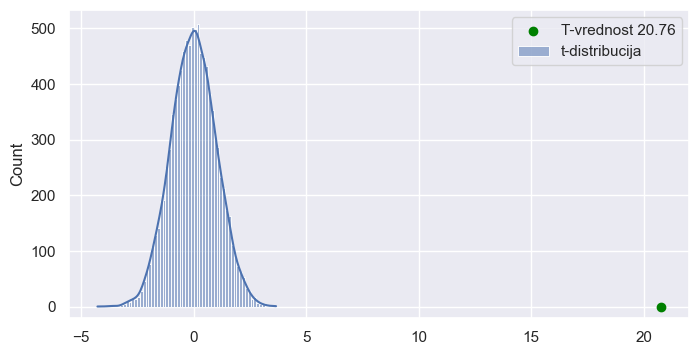

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     431.2
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.80e-58
Time:                        18:19:41   Log-Likelihood:                -2912.5
No. Observations:                 280   AIC:                             5829.
Df Residuals:                     278   BIC:                             5836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.942e+04   1608.768     18.288   

In [6]:
plot_t_dist() # plotuj t-distribuciju
t_value = model.tvalues[1] # T-vrednost
plt.scatter(t_value, 0, label=f'T-vrednost {t_value:.2f}', c='green') # plotuj T-vrednost

plt.ylim(-20)
plt.legend()
plt.show()

print(model.summary())


Podsetimo se, hipoteza pretpostavlja da **ne postoji** linearna veza između $X$ i $Y$. Ako T-vrednost nije česta, hipoteza ne važi => zaključujemo da je odnos linearan.

Pošto konkretna T-vrednost (20.76) nije česta, hipoteza ne važi => postoji linearna veza između $X$ i $Y$ ✅.

### P-vrednost
Umesto T-vrednosti, linearnost možemo da proverimo koristeći p-vrednost.
P-vrednost je verovatnoća da ćemo iz t-distribucije izvući konkretnu T-vrednost (20.76) ili neku još manje verovatnu (npr. 28, 50, -50, 123,...).
Ako je p-vrednost mala, onda T-vrednost nije česta i veza između $X$ i $Y$ jeste linearna.

**Šta je *mala* p-vrednost?**

Kao prag se obično uzima vrednost $\alpha = 0.05 = 5\%$ (eng. *significance level*).
Ako je konkretna `p-vrednost ≤ 0.05` onda hipoteza ne važi => 95% smo sigurni da veza jeste linearna ✅.

Pogledaj gore u pozivu metode `summary()` kolika je p-vrednost (obeleženo sa `P>|t|`). Vidimo da je mali broj, blizu 0. 

Konkretan broj za p-vrednost:

In [7]:
alpha = 0.05 # significance level
p_value = model.pvalues[1] # p-value
print(p_value)

if p_value < alpha:
    print('veza je linearna')
else:
    print('veza je mozda nelinearna, a mozda linearna')

1.798965885933427e-58
veza je linearna


Vidimo da je p-vrednost izuzetno mala, daleko ispod praga `alpha`, pa smo pokazali da linearnost postoji ✅.

Proširujemo funkciju (sa prošlih vežbi) koja proverava linearnost, dodajući t-test.
Više ne moramo da crtamo grafik da bi proverili linearnost veze, vež linearnost proveravamo koristeći t-test.

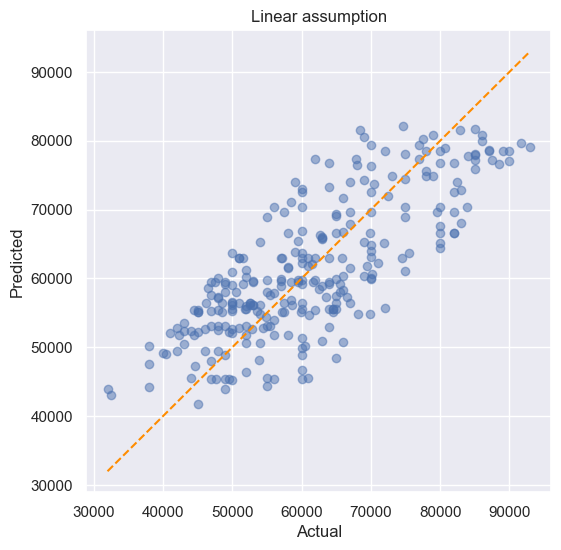

veza je linearna
1.798965885933427e-58


In [8]:
def linear_assumption(model, features, labels, p_value_thresh=0.05, plot=True):
    '''
    Linear assumption: assumees linear relation between the independent and dependent variables to be linear.
    Testing linearity using the t-test.

    Interpretation of `p-value`:
    - `p-value >= p_value_thresh` indicates linearity between `X` and `Y`.
    - `p-value < p_value_thresh` doesn't indicate linearity.

    Returns (only if the model is from `statsmodels` not from `scikit-learn`):
    - is_linearity_found: A boolean indicating whether the linearity assumption is supported by the data.
    - p_value: The p-value obtained from the linearity test.
    '''
    y_pred = model.predict(features)

    if plot:
        plt.figure(figsize=(6,6))
        plt.scatter(labels, y_pred, alpha=.5)
        # x = y line
        line_coords = np.linspace(np.concatenate([labels, y_pred]).min(), np.concatenate([labels, y_pred]).max())
        plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
        plt.title('Linear assumption')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.show()

    p_value = model.pvalues[1]
    is_linearity_found = True if p_value < p_value_thresh else False
    return is_linearity_found, p_value

x = df['lotsize(m^2)']
y = df['price']

x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const).fit()
is_linearity_found, p_value = linear_assumption(model, x_with_const, y, plot=True)

if is_linearity_found: print('veza je linearna')
else: print('veza je mozda nelinearna, a mozda linearna')
print(p_value)

## Interval poverenja

<img style="float:right; max-width:400px" src="imgs/conf_int.png" width="60%" />

Skup podataka sa kojim radimo sadrži podatke o 280 kuća u gradu Windsor. Koristimo linearni model $y = ax + b$ kako bismo procenili stvarne vrednosti kuća. Važno je napomenuti da nemamo podatke o cenama svih kuća u tom gradu, već samo o određenom broju kuća. U stvarnom svetu to je redovna pojava i retko imamo pristup svim podacima, već samo određenom broju.

Da smo imali  drugačije podatke dobili bi nešto drugačiji model sa drugačijim vrednostima za nagib i presek. 
Postavlja se pitanje: koliko bi se promenili parametri modela kada bi proširili skup podataka? Koliko je trenutni model dobar? 
Da bismo na ovo odgovorili treba nam *sigurnost* koju zovemo interval poverenja.

Interval poverenja (eng. *confidence interval*) je raspon u kom će se naći prava vrednost parametara. Pravu vrednost parametara bi dobili kada bi imali celu populaciju u skupu podataka, a ne samo uzorak iz populacije. Npr. kada bi imali popisane sve kuće iz grada Windsor, a ne samo njih 280.
Interval poverenja ne računamo ručno već koristimo `statsmodels` koji automatski računa interval.

Interval poverenja se kreira za neki procenat pouzdanost, slično kao što smo kod [p-vrednosti](###p-vrednost) uzimali prag od 95%. 
Tako i ovde želimo sa 95% tačnosti da odredimo između kojih vrednosti se nalazi npr. nagib?

Intervale poverenje dobijamo pozivom metode `model.conf_int()`, ili alternativno citamo iz `model.summary()` ( obelezeno sa `[0.025      0.975]`).

In [9]:
print(model.conf_int())
print('----')
print(model.summary())

                         0             1
const         26254.970257  32588.797778
lotsize(m^2)     72.475833     87.656880
----
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     431.2
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.80e-58
Time:                        18:19:41   Log-Likelihood:                -2912.5
No. Observations:                 280   AIC:                             5829.
Df Residuals:                     278   BIC:                             5836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-

Tumačenje prethodnog ispisa u konzoli: sa pouzdanošću od 95% tvrdimo da se cena kuće poveća za iznos između 72.4$ i 87.6$ kada se površina placa poveća za $1m^2$.

Vizualizujemo interval poverenje za nagib:
- plava linija - prediktovana regresija (kao i do sad).
- zelena linija - cena kuće se poveća za minimum 72.4$ kada se površina placa poveća za $1m^2$.
- crva linija - cena kuće se poveća za maksimum 87.6$ kada se površina placa poveća za $1m^2$.

Sa 95% tvrdimo da se nagib regresionog modela nalazi između zelene i crvene linije.

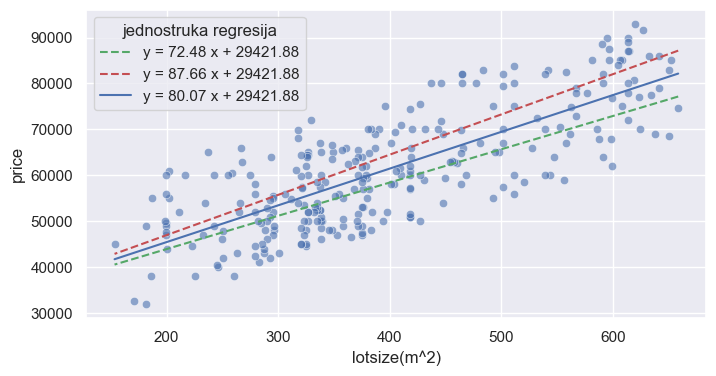

In [10]:
# indeksiramo drugi red u tabeli, tj. interval poverenja za nagib
low_slope, high_slope = model.conf_int(alpha).iloc[1]

y_pred1 = low_slope * x + intercept
y_pred2 = high_slope * x + intercept

plt.plot(x, y_pred1, 'g--', label=f'y = {low_slope:.2f} x + {intercept:.2f}')
plt.plot(x, y_pred2, 'r--', label=f'y = {high_slope:.2f} x + {intercept:.2f}')

# plotuj podatke i liniju koja se nabolje uklapa (best fit)
sb.scatterplot(data=df, x='lotsize(m^2)', y='price', alpha=0.6)
plt.plot(x, y_pred, 'b', label=f'y = {slope:.2f} x + {intercept:.2f}')
plt.legend(title='jednostruka regresija')
plt.show()

Slično kao i za nagib, možemo vizualizovati interval poverenja za presek (probaj samostalno da uradiš). 


## Interval predikcije
Do sad smo intervale poverenja tražili za parametre (nagib i odsečak).
Intervale poverenja možemo da definišemo i za same predikcije.

Interval predikcije odgovara na pitanje - između kojih vrednosti se nalazi $Y_i$ za dato $X_i$? Npr. koji je raspon cene kuće sa placom od $450m^2$ ?

Interval predikcije dobijamo pozivom metode `model.get_prediction(x_with_const).summary_frame()`.

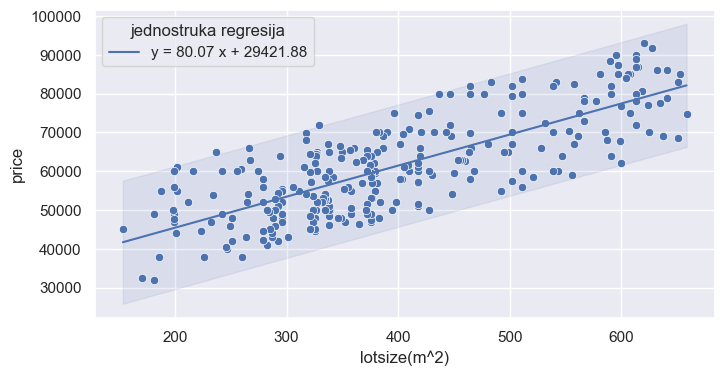

In [11]:
alpha = 0.05 # 95% significance level
pred_intervals = model.get_prediction(x_with_const).summary_frame(alpha)

# plotuj interval predikcije
plt.fill_between(df['lotsize(m^2)'],
                pred_intervals['obs_ci_lower'],
                pred_intervals['obs_ci_upper'],
                color='b',
                alpha=.1)

# plotuj podatke i liniju koja se nabolje uklapa (best fit)
sb.scatterplot(data=df, x='lotsize(m^2)', y='price')
plt.plot(x, y_pred, 'b', label=f'y = {slope:.2f} x + {intercept:.2f}')
plt.legend(title='jednostruka regresija')
plt.show()

Sa grafika vidimo u kom rasponu je otprilike cena kuće sa placom od $450m^2$ (između 50.000$ i 80.000$). Računamo tačan interval predikcije za plac od $450m^2$ u nastavku:

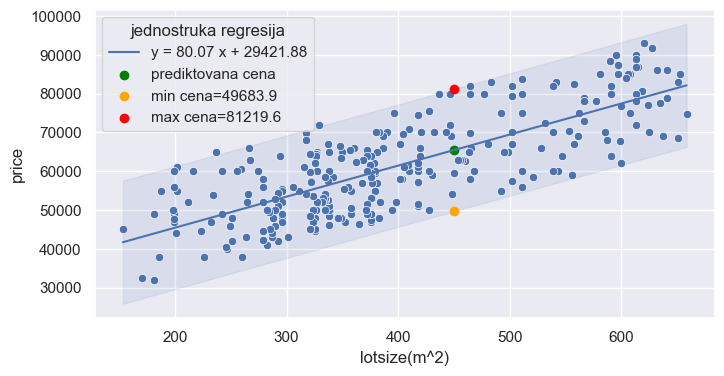

In [12]:
pred_intervals = model.get_prediction(x_with_const).summary_frame(alpha)

# plotuj interval predikcije
plt.fill_between(df['lotsize(m^2)'],
                pred_intervals['obs_ci_lower'],
                pred_intervals['obs_ci_upper'],
                color='b',
                alpha=.1)


# plotuj podatke i liniju koja se nabolje uklapa (best fit)
sb.scatterplot(data=df, x='lotsize(m^2)', y='price')
plt.plot(x, y_pred, 'b', label=f'y = {slope:.2f} x + {intercept:.2f}')

# racunamo min i max cenu za za kucu sa placom od 450m^2
# definisemo povrsinu placa od 450m^2 (statsmodels zahteva ovakav input)
# racunamo interval predikcije  za datu vrednost od 450
lotsize = 450
lotsize_with_const = sm.add_constant([0, lotsize])
pred_intervals = model.get_prediction(lotsize_with_const).summary_frame(alpha)

mean_y_pred = pred_intervals['mean'][1] # prosecna prediktovanu cenu (kao i do sad)
low_y_pred = pred_intervals['obs_ci_lower'][1] # minimalna cena prema intervalu predikcije
high_y_pred = pred_intervals['obs_ci_upper'][1] # maksimalna cena prema intervalu predikcije

# plotuj interval predikcije za plac velicine 450m^2
plt.scatter(lotsize, mean_y_pred, c='green', label='prediktovana cena')
plt.scatter(lotsize, low_y_pred, c='orange', label=f'min cena={low_y_pred:.1f}')
plt.scatter(lotsize, high_y_pred, c='red', label=f'max cena={high_y_pred:.1f}')

plt.legend(title='jednostruka regresija')
plt.show()

Sa grafika vidimo da je očekivana minimalna cena 49.684$, a maksimalna 81.219$ za kuću od 450$. Ovo tvrdimo sa 95% tačnosti.

## Zadaci
**TODO 1:** Napraviti regresioni model koji predviđa cenu kuće na osnovu površine placa koristeći `statsmodels` i zatim:
1. statističkim testom proveri da li je linearnost modela zadovoljena.
1. proveri da li je linearnost modela zadovoljena za nivo pouzdanosti od 99%.
1. nacrtaj najgori i najbolji moguć slučaj (gornju i donju granicu regresione linije) za nivo pouzdanosti od 99%.
1. Ako kupac želi da kupi kuću sa placem od $120m^2$, izračunaj koliko minimalno para mora da potroši za kupovinu kuće. Nacrtaj takvu kuću na grafiku. Za interval poverenja računaj nivo pouzdanosti od 99%.

<!-- 1. Ako kupac planira da potrosi izmedju 50.000$ i 60.000$, koji je raspon povrsine placa koju moze da kupi?  Racunaj stadardni nivo pouzdanosti od 95%. -->

**TODO 2:** Napraviti model linearne regresije koji predviđanja stopu mortaliteta od raka kože na osnovu geografske širine koristeći [data/skincancer.csv](data/skincancer.csv) i zatim:
1. Pronaći minimalnu i maksimalnu očekivanu stopu mortaliteta od raka kože u Novom Sadu. Nacrtati tačke na grafiku. *Koordinate Novog Sada: 45.2396° N, 19.8227° E.*
1. Obrazložiti da li su validne nađene vrednosti.
1. Da li prema regresionom modelu postoji stopa mortaliteta od raka kože na Severnom polu? Obrazloži odgovor. *Gografska sirina Servernog pola je 90° N.*

*Napomena: Ukoliko nije drugačije navedeno, smatra se da je nivo pouzdanosti 95%.*